In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import sparse
import copy
import pandas as pd

### load unique files , features of each sample, and metadata of each sample

In [3]:
UniqueFileIndex = np.load("UniqueRows.npy")
Features = np.load("FileCompoundFeatures.npy")
MegaLabel = np.load("MegaLabelExtra.npy")
UniqueList = np.load("UniqueList.npy",allow_pickle = True, encoding='latin1')
ColumnNames = np.load("ColumnNames.npy", allow_pickle = True, encoding='latin1')
extraColumn = np.load("MSVDataSet.npy")

In [5]:
#data = pd.read_csv("MSVData.csv") 

In [6]:
Features.shape

(34087, 13211)

In [7]:
MegaLabel = np.hstack((MegaLabel,extraColumn))

In [8]:
Features =Features[UniqueFileIndex,:]
MegaLabel = MegaLabel[UniqueFileIndex,:]

In [9]:
a = np.unique(MegaLabel[:,9],return_index = True)
MegaLabel = MegaLabel[a[1],:]
Features = Features[a[1],:]

In [10]:
ind = np.where(MegaLabel[:,5] != 100)[0]
MegaLabel = MegaLabel[ind,:]
Features = Features[ind,:]

In [11]:
MegaLabelTemp = copy.deepcopy(MegaLabel)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [13]:
perm = np.random.permutation(19497)

### increase datasets sets size where points from a single datasets can be both in training and test

In [15]:
lis = []
for k in range(1,8):
    print(k)
    length = k * 300
    temp = []
    for t in range(1,11):
        clf = LogisticRegression(random_state=0, penalty = 'l1', C = .1*t, class_weight = "balanced", solver = 'liblinear').fit(Features[perm[0:int(length*.8)],:], MegaLabelTemp[perm[0:int(length*.8)],7])
        temp.append(clf.score(Features[perm[int(length * .8):length],:], MegaLabelTemp[perm[int(length * .8):length],7]))
    t = np.argmax(temp) + 1
    clf = LogisticRegression(random_state=0, penalty = 'l1', C = .1*t, class_weight = "balanced", solver = 'liblinear').fit(Features[perm[0:int(length*.8)],:], MegaLabelTemp[perm[0:int(length*.8)],7])
    lis.append(clf.score(Features[perm[3000:],:], MegaLabelTemp[perm[3000:],7]))

1
2
3


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


4
5
6
7


In [16]:
lis

[0.8514275322785961,
 0.8796750924410499,
 0.9252591380250955,
 0.9348366369642965,
 0.9381099593865552,
 0.9422319209553253,
 0.9468994362611384]

In [17]:
arr = np.arange(1,8)
arr = arr *300

In [18]:
csfont = {'fontname':'Times New Roman'}

(array([0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

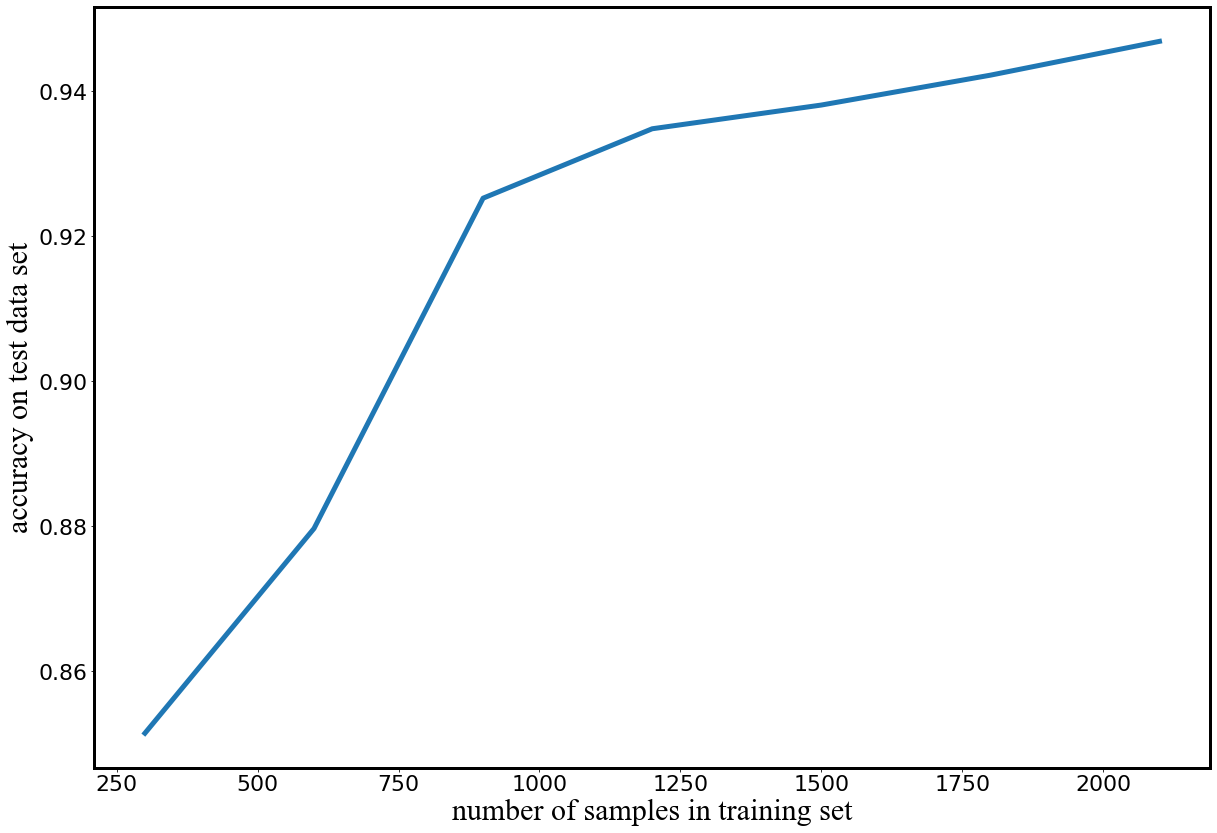

In [19]:
plt.rcParams['axes.linewidth'] = 3.0
fig = plt.figure(figsize = (20,14))
plt.plot(arr,lis,linewidth = 5.0)
plt.xlabel("number of samples in training set", fontsize = 30, **csfont) 
plt.ylabel("accuracy on test data set", fontsize = 30, **csfont)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)


In [20]:
fig.savefig("ClassificationIncreaseMSVDatasetSampleTypeYes.eps" , format='eps', dpi=1000)

### increase datasets sets size where a single dataset will be either in training or test

In [21]:
total = np.zeros((8))
for f in range(0,5):
    perm = np.random.permutation(110)
    print(f)
    lis = []
    arr = []

    for k in [5,10,15,20,30,40,50,60]:
        temp = []
        for j in range(1,11):
            TrainingSetIndex= np.where((perm[MegaLabelTemp[:,14].astype('int')] <k) )[0]
            TestingSetIndex = np.where(perm[MegaLabelTemp[:,14].astype('int')] >=65)[0]
            TI = TrainingSetIndex
            arr.append(len(TI))
            clf = LogisticRegression(random_state=0, penalty = 'l1', C = j * 1.0/10, class_weight = "balanced", solver = 'liblinear').fit(Features[TI[0:int(.8*len(TI))],:], MegaLabelTemp[TI[0:int(.8*len(TI))],5])
            #TI = TestingSetIndex
            temp.append(clf.score(Features[TI[int(.8*len(TI)):],:], MegaLabelTemp[TI[int(.8*len(TI)):],5]))
        t = np.argmax(temp) +1
        #clf = LogisticRegression(random_state=0, penalty = 'l1', C = 8 * 1.0/10, class_weight = "balanced").fit(Features[TI[0:int(.8*len(TI))],:], MegaLabelTemp[TI[0:int(.8*len(TI))],7])
        clf = LogisticRegression(random_state=0, penalty = 'l1', C = j * 1.0/10, class_weight = "balanced", solver = 'liblinear').fit(Features[TI[0:int(.8*len(TI))],:], MegaLabelTemp[TI[0:int(.8*len(TI))],5])
        TI = TestingSetIndex
        lis.append(clf.score(Features[TI,:], MegaLabelTemp[TI,5]))
    print(lis)
     
    total = total + np.asarray(lis)
    
        #print(np.bincount(MegaLabelTemp[TrainingSetIndex,7].astype(int)))

0
[0.07276443536024527, 0.15707715891670926, 0.20838017373530915, 0.32304547777210013, 0.42718446601941745, 0.5063873275421563, 0.4722534491568728, 0.4905467552376086]
1


KeyboardInterrupt: 

In [ ]:
csfont = {'fontname':'Times New Roman'}

In [ ]:
plt.rcParams['axes.linewidth'] = 3.0
fig = plt.figure(figsize = (20,14))
plt.plot(arr,total/5,linewidth = 5.0)
plt.xlabel("number of data sets composing training set", fontsize = 30, **csfont) 
plt.ylabel("accuracy on test set", fontsize = 30, **csfont)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)


In [150]:
#perm = np.random.permutation(19497)

In [151]:
#    clf = LogisticRegression(random_state=0, penalty = 'l1', C = .1, class_weight = "balanced").fit(Features[perm[0:15000],:], MegaLabelTemp[perm[0:15000],5])

In [152]:
#clf.score(Features[perm[15000:],:], MegaLabelTemp[perm[15000:],5])

0.8748054258394485

In [175]:
#A = np.zeros((19497,5)).astype('O')

In [176]:
#A[:,0] = np.sort(UniqueList[11])[MegaLabelTemp[perm,11].astype('int')]

In [177]:
#A[0:15000,1] = "Training"; A[15000:,1] = "Test"

In [178]:
#A[:,2] = clf.predict(Features[perm,:]).astype('int')

In [179]:
#A[:,3] = MegaLabelTemp[perm,5].astype('int')

In [180]:
#np.unique(A[:,2])

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=object)

In [181]:
#t = np.where((A[:,2] <6) * (A[:,3] <6) )[0]

In [182]:
#A = A[t,:]#

In [183]:
#A[:,2] = np.sort(UniqueList[5])[A[:,2].astype('int')]

In [184]:
#A[:,3] = np.sort(UniqueList[5])[A[:,3].astype('int')]

(10078, 5)

In [186]:
#A

array([['f.MSV000083559/ccms_peak/Raw_Files/Plate1/samples/11713.2.F.2H.mzML',
        'Training', 'Infancy (<2 yrs)', 'Infancy (<2 yrs)', 0.0],
       ['f.MSV000080673/ccms_peak/2017.AmericanGut3K.mzXMLfiles/Samples/000036901_RC6_01_4008.mzML',
        'Training', 'Middle Adulthood (45 yrs < x <= 65 yrs)',
        'Early Adulthood (18 yrs < x <= 45 yrs)', 0.0],
       ['f.MSV000081486/ccms_peak/mzXML/2017_study_malawi/samples/FB00252615_RF3_01_15274.mzML',
        'Training', 'Middle Adulthood (45 yrs < x <= 65 yrs)',
        'Infancy (<2 yrs)', 0.0],
       ...,
       ['f.MSV000083462/ccms_peak/Oral_verified/mzxml_1/Samples/11712.SUBJECT14.ORAL.119.A.mzML',
        'Test', 'Infancy (<2 yrs)', 'Infancy (<2 yrs)', 0.0],
       ['f.MSV000083462/ccms_peak/Oral_verified/mzxml_1/Samples/11712.SUBJECT37.ORAL.789.A.mzML',
        'Test', 'Infancy (<2 yrs)', 'Infancy (<2 yrs)', 0.0],
       ['f.MSV000083077/ccms_peak/Plate3/PHT_20_141_Cort_1900.mzML',
        'Test', 'Early Adulthood (18 yrs

In [187]:
#A[1000,:]

array(['f.MSV000082582/ccms_peak/raw_files/samples/day_60/control_food/6_Control_CDR_SD_3.mzML',
       'Training', 'Infancy (<2 yrs)', 'Infancy (<2 yrs)', 0.0],
      dtype=object)

In [188]:
#B = np.chararray(10078,4)

In [189]:
#B = A

In [190]:
#fields = ["File Name", "Training or Test", "Predicted Value", "True Value" ]

In [191]:
#filename = "LifeStagePrediction.csv"

In [192]:
#import csv  
#with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
#    csvwriter = csv.writer(csvfile)  
        
    # writing the fields  
#    csvwriter.writerow(fields)  
        
    # writing the data rows  
#    csvwriter.writerows(B) 